In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, GRU
from tensorflow.keras.callbacks import History 

from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Let's get the stock data
real= pd.read_excel('/content/DatasetFinal_Fix.xlsx')
real.head()

,text,label,target
0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,Geopolitical,1.0
1,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,Geopolitical,1.0
2,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,Religious,2.0
3,আমরা বলতে কারা ভারত তাইতো,Geopolitical,1.0
4,পাকিস্তান আমার বাল,Geopolitical,1.0


In [ ]:
fake = pd.read_excel("/content/TargetData (1) (1) (1).xlsx")
fake.head()




,Date,id,text,label,target
0,2021-04-13,NaN,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,Geopolitical,1
1,2020-01-04,NaN,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,Geopolitical,1
2,2019-12-15,NaN,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,Religious,2
3,2019-12-04,NaN,আমরা বলতে কারা ভারত তাইতো,Geopolitical,1
4,2022-05-31,NaN,পাকিস্তান আমার বাল,Geopolitical,1


In [ ]:
# Create Target based on Real and Fake data
real['Category'] = 1
fake['Category'] = 0

In [ ]:
print(real.shape)
real.head()

(4869, 4)


,text,label,target,Category
0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,Geopolitical,1.0,1
1,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,Geopolitical,1.0,1
2,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,Religious,2.0,1
3,আমরা বলতে কারা ভারত তাইতো,Geopolitical,1.0,1
4,পাকিস্তান আমার বাল,Geopolitical,1.0,1


In [ ]:
print(fake.shape)
fake.head()

(99, 6)


,Date,id,text,label,target,Category
0,2021-04-13,NaN,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,Geopolitical,1,0
1,2020-01-04,NaN,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,Geopolitical,1,0
2,2019-12-15,NaN,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,Religious,2,0
3,2019-12-04,NaN,আমরা বলতে কারা ভারত তাইতো,Geopolitical,1,0
4,2022-05-31,NaN,পাকিস্তান আমার বাল,Geopolitical,1,0


In [ ]:
dataset = pd.concat([real, fake]).reset_index(drop=True)

In [ ]:
print(dataset.shape)
dataset.head()

(4968, 6)


,text,label,target,Category,Date,id
0,ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...,Geopolitical,1.0,1,NaT,NaN
1,রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবে,Geopolitical,1.0,1,NaT,NaN
2,এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...,Religious,2.0,1,NaT,NaN
3,আমরা বলতে কারা ভারত তাইতো,Geopolitical,1.0,1,NaT,NaN
4,পাকিস্তান আমার বাল,Geopolitical,1.0,1,NaT,NaN


In [ ]:
dataset.isnull().sum()

text           0
label          0
target         1
Category       0
Date        4953
id          4968
dtype: int64

In [ ]:
dataset['final_text'] = dataset['text'] + dataset['label']
dataset['final_text'].head()

0    ইনিই হচ্ছেন ভারতের প্রতিরক্ষামন্ত্রী মনোহর পা...
1    রেন্ডিয়াকে পৃথীবির মানচিএ থেকে মুচে ফেলতে হবেG...
2    এই মালাউনরা বাংগালিদের সাফল্য দেখে হিংসা করে ব...
3                আমরা বলতে কারা ভারত তাইতোGeopolitical
4                       পাকিস্তান আমার বালGeopolitical
Name: final_text, dtype: object

In [ ]:
dataset['Category'].value_counts()

1    4869
0      99
Name: Category, dtype: int64

In [ ]:
dataset[['Category','text','final_text']].groupby(['Category','text']).count()

final_text
Category text                                                          
0         আসোলে বিএনপি একটা রাজাকার সভায় জেনে গেছে                   1
          ইন্ডিয়ায় মালাউনরা কুওার সাথে বিবাহ করছে গরুর ম...           1
          এবং জামাত শিবির কে নিয়ে সম্মেলন করুক পাকিস্তান              1
          চুরের মার বড় গলা শালা মালাউনের বাচ্চা প্রতিটা ...           1
          ছাএ শিবিরের সময় উপযোগী একটি উদোগ  বিরোধিতার জন...           1
...                                                                 ...
1        ৩ নাম্বার মাল টার পাজামার ফিতা বের হয়ে আছে                   2
         ৬০-৭০ বছরের মানসিক বিকারগ্রস্ত ধর্ষক মুসলমানরা ...           1
         ৬০-৭০ বছরের মানসিক বিকারগ্রস্ত ধর্ষক মুসলমানরা ...           1
         ৮০র দশকের স্বৈরাচারীর পতন ৯১ এ ঘটেছে,                        1
         ৯৬ সালে সরকার গঠনের পরই বিশ্বের বিভিন্ন দেশে দূ...           1

[4375 rows x 1 columns]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2489 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2458 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2509 missing from current font.
  font.set_text(s

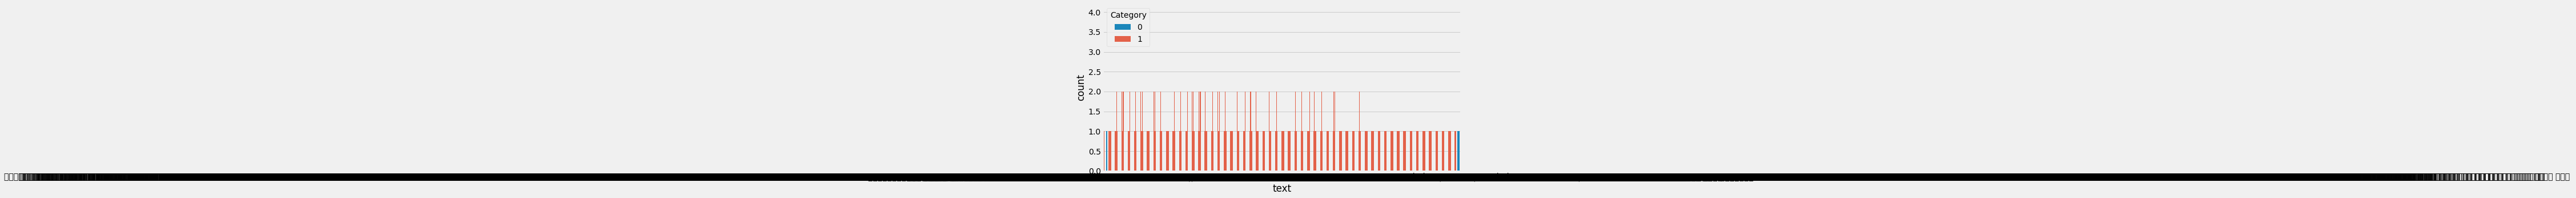

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x= "text", hue = "Category", data=dataset)

In [ ]:
porter_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
stemmed_text = []
lemmatized_text = []
final_text_result = []
for text in dataset['final_text']:
    result = re.sub('[^a-zA-Z]', ' ', text)
    result = result.lower()
    result = result.split()
    result = [r for r in result if r not in set(stopwords.words('english'))]
    final_text_result.append(" ".join(result))
    stemmed_result = [porter_stemmer.stem(r) for r in result]
    stemmed_text.append(" ".join(stemmed_result))
    lemmatized_result = [lemmatizer.lemmatize(r) for r in result]
    lemmatized_text.append(" ".join(lemmatized_result))

In [ ]:
print(len(final_text_result))
print(len(stemmed_text))
print(len(lemmatized_text))

4968
4968
4968


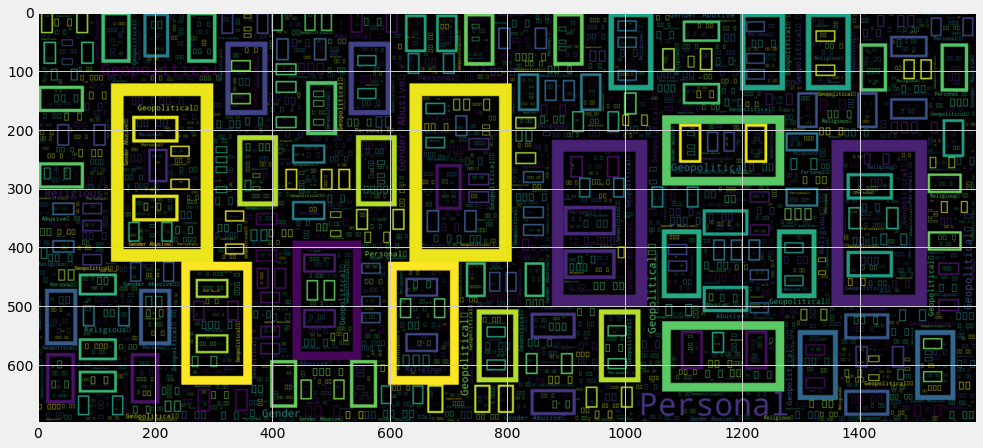

In [ ]:
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(dataset[dataset.Category==1].final_text))
plt.imshow(wc, interpolation="bilinear")

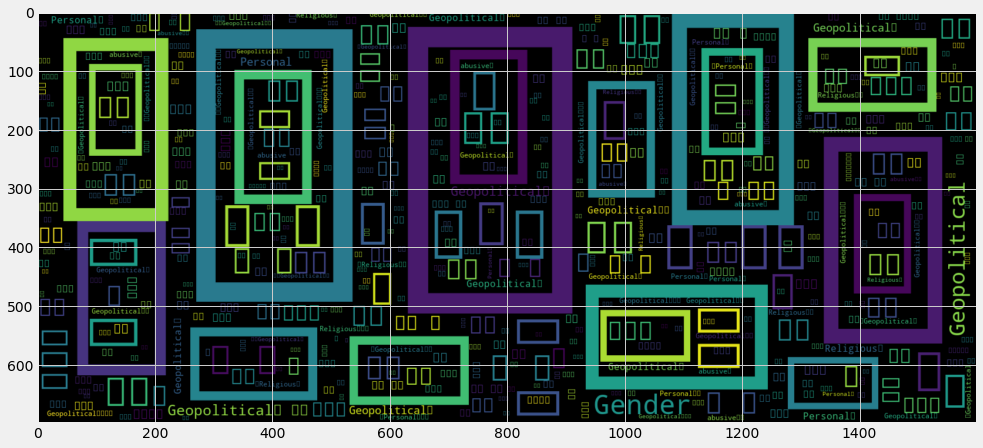

In [ ]:
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(dataset[dataset.Category==0].final_text))
plt.imshow(wc, interpolation="bilinear")

In [ ]:
def get_prediction(vectorizer, classifier, X_train, X_test, y_train, y_test):
    pipe = Pipeline([('vector', vectorizer),
                    ('model', classifier)])
    model = pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)
    print("Classification Report: \n", classification_report(y_test, y_pred))

In [ ]:
print("******USING STEMMED TEXT********")
X_train, X_test, y_train, y_test = train_test_split(stemmed_text, dataset['Category'], test_size = 0.3, random_state= 0)
classifiers = [LogisticRegression(), SGDClassifier(), MultinomialNB(), BernoulliNB(), LinearSVC(),
              KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(), GradientBoostingClassifier(), 
               RandomForestClassifier(), XGBClassifier()]
for classifier in classifiers:
    print("\n\n", classifier)
    print("***********Usng Count Vectorizer****************")
    get_prediction(CountVectorizer(), classifier, X_train, X_test, y_train, y_test)
    print("***********Usng TFIDF Vectorizer****************")
    get_prediction(TfidfVectorizer(), classifier, X_train, X_test, y_train, y_test)

******USING STEMMED TEXT********


 LogisticRegression()
***********Usng Count Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



 SGDClassifier()
***********Usng Count Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    r

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



 BernoulliNB()
***********Usng Count Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



 KNeighborsClassifier()
***********Usng Count Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   2

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



 DecisionTreeClassifier()
***********Usng Count Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



 GradientBoostingClassifier()
***********Usng Count Vectorizer****************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



 RandomForestClassifier()
***********Usng Count Vectorizer****************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



 XGBClassifier()
***********Usng Count Vectorizer****************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("******USING LEMMATIZED TEXT********")
X_train, X_test, y_train, y_test = train_test_split(lemmatized_text, dataset['Category'], test_size = 0.3, random_state= 0)
classifiers = [LogisticRegression(), SGDClassifier(), MultinomialNB(), BernoulliNB(), LinearSVC(),
              KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(), GradientBoostingClassifier(), 
               RandomForestClassifier(), XGBClassifier()]
for classifier in classifiers:
    print("\n\n", classifier)
    print("***********Usng Count Vectorizer****************")
    get_prediction(CountVectorizer(), classifier, X_train, X_test, y_train, y_test)
    print("***********Usng TFIDF Vectorizer****************")
    get_prediction(TfidfVectorizer(), classifier, X_train, X_test, y_train, y_test)

******USING LEMMATIZED TEXT********


 LogisticRegression()
***********Usng Count Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



 SGDClassi

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



 MultinomialNB()
***********Usng Count Vectorizer****************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



 BernoulliNB()
***********Usng Count Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    rec

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



 KNeighborsClassifier()
***********Usng Count Vectorizer****************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



 DecisionTreeClassifier()
***********Usng Count Vectorizer****************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



 GradientBoostingClassifier()
***********Usng Count Vectorizer****************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



 RandomForestClassifier()
***********Usng Count Vectorizer****************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



 XGBClassifier()
***********Usng Count Vectorizer****************
Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491

***********Usng TFIDF Vectorizer****************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Accuarcy: 98.05
Confusion Matrix: 
 [[   0   29]
 [   0 1462]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM
from keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

In [ ]:
voc_size = 5000
onehot_stemmed_text = [one_hot(word, voc_size) for word in stemmed_text]
print(len(onehot_stemmed_text))
onehot_stemmed_text[0]

4968


[424]

In [ ]:
sent_length = 400
embedded_text = pad_sequences(onehot_stemmed_text, padding='pre', maxlen=sent_length)
print(embedded_text)

[[   0    0    0 ...    0    0  424]
 [   0    0    0 ...    0    0  424]
 [   0    0    0 ...    0    0 1027]
 ...
 [   0    0    0 ...    0 1270 3044]
 [   0    0    0 ...    0    0  424]
 [   0    0    0 ...    0    0  424]]


In [ ]:
embedding_vector_features = 600
model1 = Sequential()
model1.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model1.add(LSTM(100))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 600)          3000000   
                                                                 
 lstm (LSTM)                 (None, 100)               280400    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 3,280,501
Trainable params: 3,280,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_final = np.array(embedded_text)
y_final = dataset['Category']

In [ ]:
X_final.shape,y_final.shape

((4968, 400), (4968,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.3, random_state = 0)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, mode='auto')

In [ ]:
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size = 256, callbacks=([reduce_lr, early_stop]))

Epoch 1/20
14/14 [==============================] - 74s 5s/step - loss: 0.2368 - accuracy: 0.9799 - val_loss: 0.1040 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 2/20
14/14 [==============================] - 67s 5s/step - loss: 0.1024 - accuracy: 0.9799 - val_loss: 0.0959 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 3/20
14/14 [==============================] - 65s 5s/step - loss: 0.0984 - accuracy: 0.9799 - val_loss: 0.0957 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 4/20
14/14 [==============================] - 65s 5s/step - loss: 0.0973 - accuracy: 0.9799 - val_loss: 0.0956 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 5/20
14/14 [==============================] - 65s 5s/step - loss: 0.0970 - accuracy: 0.9799 - val_loss: 0.0956 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 6/20
14/14 [==============================] - 65s 5s/step - loss: 0.0967 - accuracy: 0.9799 - val_loss: 0.0959 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 7/20
14/14 [==============================] - 64s 5s/step - loss: 0.0971 - a

In [ ]:
y_pred = model1.predict_classes(X_test)
print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))

AttributeError: ignored

In [ ]:
predict_x=model1.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
predictions = (model1.predict(X_test) > 0.5).astype("int32")
print("predictions shape:", predictions.shape)


predictions shape: (1491, 1)


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model1.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
12/12 [==============================] - 9s 698ms/step - loss: 0.0957 - accuracy: 0.9805
test loss, test acc: [0.09570559114217758, 0.9805499911308289]


In [ ]:
cm = confusion_matrix(y_test, predict_x)
print("Confusion Matrix: \n", cm)

ValueError: ignored

In [ ]:
print(confusion_matrix(y_test, predictions))

[[   0   29]
 [   0 1462]]


In [ ]:
print("Classification Report: \n", classification_report(y_test, predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**LSTM MODEL **


In [ ]:
voc_size = 5000
onehot_lemmatized_text = [one_hot(word, voc_size) for word in lemmatized_text]
print(len(onehot_lemmatized_text))
onehot_lemmatized_text[0]

4968


[781]

In [ ]:
sent_length = 400
embedded_text = pad_sequences(onehot_lemmatized_text, padding='pre', maxlen=sent_length)
print(embedded_text)

[[   0    0    0 ...    0    0  781]
 [   0    0    0 ...    0    0  781]
 [   0    0    0 ...    0    0  116]
 ...
 [   0    0    0 ...    0 1270 4156]
 [   0    0    0 ...    0    0  781]
 [   0    0    0 ...    0    0  781]]


In [ ]:
embedding_vector_features = 600
model2 = Sequential()
model2.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model2.add(LSTM(100))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 600)          3000000   
                                                                 
 lstm_1 (LSTM)               (None, 100)               280400    
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 3,280,501
Trainable params: 3,280,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_final = np.array(embedded_text)
y_final = dataset['Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.3, random_state = 0)

In [ ]:
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size = 256, callbacks=([reduce_lr, early_stop]))

Epoch 1/20
14/14 [==============================] - 76s 5s/step - loss: 0.2677 - accuracy: 0.9080 - val_loss: 0.1076 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 2/20
14/14 [==============================] - 71s 5s/step - loss: 0.1060 - accuracy: 0.9799 - val_loss: 0.0966 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 3/20
14/14 [==============================] - 70s 5s/step - loss: 0.0981 - accuracy: 0.9799 - val_loss: 0.0956 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 4/20
14/14 [==============================] - 69s 5s/step - loss: 0.0973 - accuracy: 0.9799 - val_loss: 0.0956 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 5/20
14/14 [==============================] - 70s 5s/step - loss: 0.0968 - accuracy: 0.9799 - val_loss: 0.0957 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 6/20
14/14 [==============================] - 72s 5s/step - loss: 0.0973 - accuracy: 0.9799 - val_loss: 0.0959 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 7/20
14/14 [==============================] - 71s 5s/step - loss: 0.0968 - a

In [ ]:
predict_x=model1.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
predictions = (model1.predict(X_test) > 0.5).astype("int32")
print("predictions shape:", predictions.shape)

predictions shape: (1491, 1)


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model2.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
12/12 [==============================] - 14s 1s/step - loss: 0.0958 - accuracy: 0.9805
test loss, test acc: [0.09584390372037888, 0.9805499911308289]


In [ ]:
print(confusion_matrix(y_test, predictions))

[[   0   29]
 [   0 1462]]


In [ ]:
print("Classification Report: \n", classification_report(y_test, predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**GRU MODEL**

In [ ]:
X_final = np.array(final_text_result)
y_final = dataset['Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.3, random_state = 0)

In [ ]:
voc_size = 5000
onehot_lemmatized_text = [one_hot(word, voc_size) for word in lemmatized_text]
print(len(onehot_lemmatized_text))
onehot_lemmatized_text[0]

4968


[781]

In [ ]:
sent_length = 400
embedded_text = pad_sequences(onehot_lemmatized_text, padding='pre', maxlen=sent_length)
print(embedded_text)

[[   0    0    0 ...    0    0  781]
 [   0    0    0 ...    0    0  781]
 [   0    0    0 ...    0    0  116]
 ...
 [   0    0    0 ...    0 1270 4156]
 [   0    0    0 ...    0    0  781]
 [   0    0    0 ...    0    0  781]]


In [ ]:
embedding_vector_features = 600
model3 = Sequential()
model3.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model3.add(GRU(100))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model3.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 400, 600)          3000000   
                                                                 
 gru_1 (GRU)                 (None, 100)               210600    
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 3,210,701
Trainable params: 3,210,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_final = np.array(embedded_text)
y_final = dataset['Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.3, random_state = 0)

In [ ]:
model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size = 256, callbacks=([reduce_lr, early_stop]))

Epoch 1/20
14/14 [==============================] - 62s 4s/step - loss: 0.2917 - accuracy: 0.9799 - val_loss: 0.1157 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 2/20
14/14 [==============================] - 57s 4s/step - loss: 0.1162 - accuracy: 0.9799 - val_loss: 0.0977 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 3/20
14/14 [==============================] - 57s 4s/step - loss: 0.0993 - accuracy: 0.9799 - val_loss: 0.0973 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 4/20
14/14 [==============================] - 57s 4s/step - loss: 0.0977 - accuracy: 0.9799 - val_loss: 0.0957 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 5/20
14/14 [==============================] - 56s 4s/step - loss: 0.0972 - accuracy: 0.9799 - val_loss: 0.0957 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 6/20
14/14 [==============================] - 56s 4s/step - loss: 0.0973 - accuracy: 0.9799 - val_loss: 0.0960 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 7/20
14/14 [==============================] - 57s 4s/step - loss: 0.0965 - a

In [ ]:
predict_x=model3.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
predictions = (model3.predict(X_test) > 0.5).astype("int32")
print("predictions shape:", predictions.shape)

predictions shape: (1491, 1)


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model3.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
12/12 [==============================] - 9s 767ms/step - loss: 0.0957 - accuracy: 0.9805
test loss, test acc: [0.09573783725500107, 0.9805499911308289]


In [ ]:
print(confusion_matrix(y_test, predictions))

[[   0   29]
 [   0 1462]]


In [ ]:
print("Classification Report: \n", classification_report(y_test, predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.98      1.00      0.99      1462

    accuracy                           0.98      1491
   macro avg       0.49      0.50      0.50      1491
weighted avg       0.96      0.98      0.97      1491



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
history = model2.fit(y_test, predictions, validation_split=0.33, epochs=30, callbacks= 
[reduce_lr, early_stop], verbose=False)


Epoch 15: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 20: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 25: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 30: ReduceLROnPlateau reducing learning rate to 1e-06.


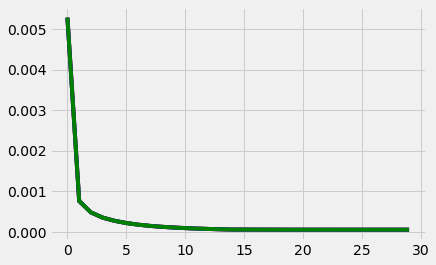

In [ ]:
plt.plot(history.history['val_loss'], 'r', history.history['val_loss'], 'b', 
history.history['val_loss'], 'g')

In [ ]:
history1 = model3.fit(y_test, predictions, validation_split=0.33, epochs=30, callbacks= 
[reduce_lr, early_stop], verbose=False)

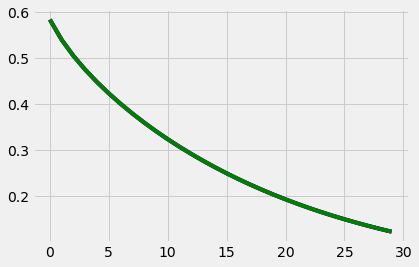

In [ ]:
plt.plot(history1.history['val_loss'], 'r', history1.history['val_loss'], 'b', 
history1.history['val_loss'], 'g')